In [2]:
import pandas as pd

In [7]:
loan_df = pd.read_csv('data_lab_export.csv')
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


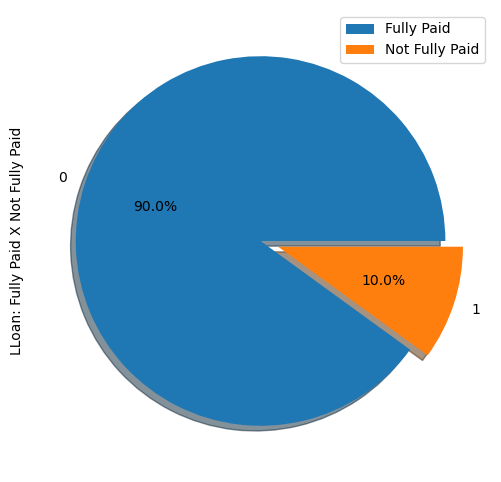

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


In [19]:
import matplotlib.pyplot as plt

def show_load_distrib(df):


    count=''
    if isinstance(df, pd.DataFrame):
        count=df['not.fully.paid'].value_counts()

    else:
        count=df.value_counts()

    count.plot(kind = 'pie', explode=[0, 0.1], figsize= (6, 6), autopct = '%1.1f%%', shadow=True)

    plt.ylabel('LLoan: Fully Paid X Not Fully Paid')
    plt.legend(["Fully Paid", "Not Fully Paid"])
    plt.show()

show_load_distrib(loan_df)
print(loan_df.dtypes)

In [20]:
load_encode = pd.get_dummies(loan_df, prefix="purpose", drop_first=True)
print(load_encode.dtypes)

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
not.fully.paid                  int64
purpose_credit_card              bool
purpose_debt_consolidation       bool
purpose_educational              bool
purpose_home_improvement         bool
purpose_major_purchase           bool
purpose_small_business           bool
dtype: object


# Separanbdo os dados para teste

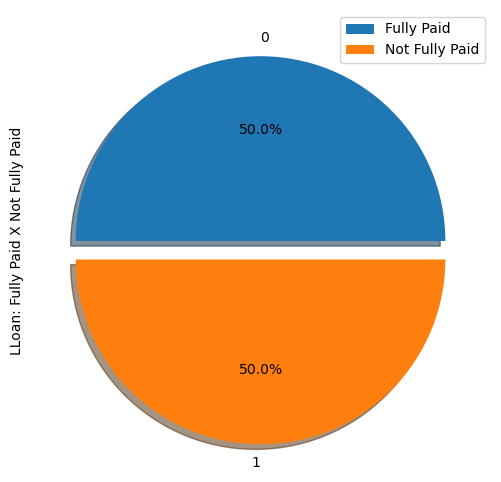

In [24]:
from sklearn.model_selection import train_test_split

X = load_encode.drop('not.fully.paid', axis= 1)
y = load_encode['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

X_train_cp = X_train.copy()
X_train_cp['not.fully.paid'] = y_train
y_0 = X_train_cp[X_train_cp['not.fully.paid'] == 0]
y_1 = X_train_cp[X_train_cp['not.fully.paid'] == 1]
y_0_undersample = y_0.sample(y_1.shape[0])
loan_data_undersample = pd.concat([y_0_undersample, y_1], axis = 0)


# Visualize the proportion of borrowers
show_load_distrib(loan_data_undersample)
